# Forest Cover Type Prediction

*Forest cover in general refers to the relative or sure land area that is covered by forests or the forest canopy or open woodland.* --Wikipedia <br> <br>
**In this model we will try to predict the forest type for a given forest based**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('../input/covtype.csv')

## Analyzing the dataset

Here, we have 581012 rows and 55 columns in this dataset

In [3]:
dataset.shape

(581012, 55)

In [4]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In the dataset, we have the following variables:
> 1. Elevation : Elevation in meters
> 2. Aspect : Aspect in degrees azimuth
> 3. Slope : Slope in degrees
> 4. Horizontal_Distance_To_Hydrology : Horizontal distance to nearet surface water features
> 5. Vertical_Distance_To_Hydrology : Vertical distance to nearet surface water features
> 6. Horizontal_Distance_To_Roadways : Horizontal distance to nearest roadway
> 7. Hillshade_9am : Hillshade index at 9am
> 8. Hillshade_Noon : Hillshade index at noon
> 9. Hillshade_3pm : Hillshade index at 3pm
> 10. Horizontal_Distance_To_Fire_Points : Horizontal dist to nearest wildfire ignition points
> 11. Widerness_Area : 4 binary columns (0->absence, 1->presence)
> 12. Soil_Type : 40 binary columns (0->absence, 1->presence)
> 13. Cover_Type : integet (1 to 7)

The first ten columns have numerical value, and the rest columns, namely, Wilderness_Area and Soil_Type, these are categorical variables with 4 and 40 different categories respectively.

### Let's first analyze our categorical variables.

#### Analyzing soil type

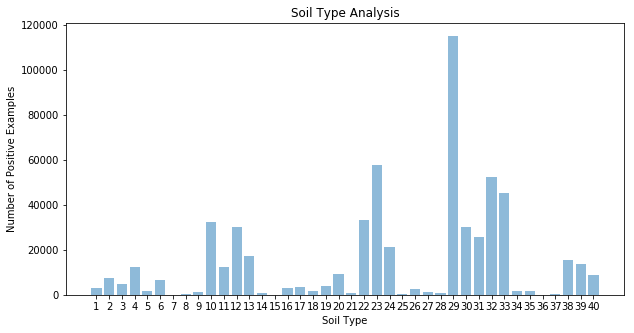

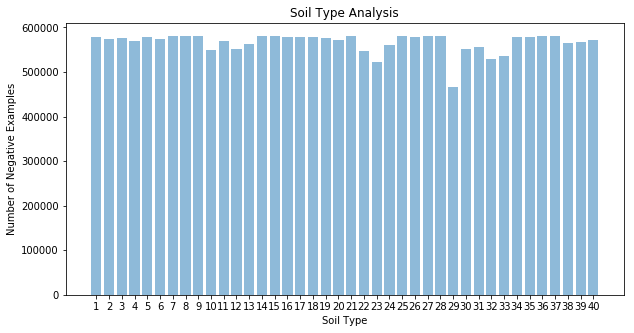

In [5]:
#plot 1
columns = ["Soil_Type"+str(i) for i in range(1,41)]
count_ones = []
for i in columns:
    count_ones.append(dataset[dataset[i]==1][i].count())
y_pos = np.arange(len(columns))
plt.figure(figsize=(10,5))
plt.bar(y_pos, count_ones, align="center", alpha=0.5)
plt.xticks(y_pos, [i for i in range(1,41)])
plt.ylabel("Number of Positive Examples")
plt.xlabel("Soil Type")
plt.title("Soil Type Analysis")
plt.show()

#plot 2
columns = ["Soil_Type"+str(i) for i in range(1,41)]
count_zeros = []
for i in columns:
    count_zeros.append(dataset[dataset[i]==0][i].count())
y_pos = np.arange(len(columns))
plt.figure(figsize=(10,5))
plt.bar(y_pos, count_zeros, align="center", alpha=0.5)
plt.xticks(y_pos, [i for i in range(1,41)])
plt.ylabel("Number of Negative Examples")
plt.xlabel("Soil Type")
plt.title("Soil Type Analysis")
plt.show()

Here, we may clearly see that our data is imbalanced. Soil_Type29 is prevalent among all the forests. Though, there are some soil types such as 7, 36 etc. which are very rare. So, there could be some direct relations between these rare soil types and their respective Cover Type. Let's find out.

In [6]:
dataset[dataset['Soil_Type7']==1]['Cover_Type'].value_counts()

2    105
Name: Cover_Type, dtype: int64

As expected, the presence of soil_type7 always has its corresponding Cover_Type as 2

#### Analyzing the cover type

In [7]:
dataset['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

## Preprocessing the dataset

The dataset is already preprocessed. There are no Null values. Also, all the categorical variables are also converted to dummy variables.

In [71]:
y = dataset['Cover_Type']
x = dataset.drop(['Cover_Type'], axis=1)

In [9]:
x = scale(x)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


#### Splitting the dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
len(x_train), len(x_test)

(464809, 116203)

#### Fitting the model

In [41]:
lr_clf = LogisticRegression(penalty='l1', C=0.1)
lr_clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = lr_clf.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           1       0.68      0.71      0.70     40814
           2       0.80      0.73      0.76     61551
           3       0.87      0.61      0.72     10231
           4       0.14      0.62      0.23       117
           5       0.02      0.27      0.03       111
           6       0.05      0.46      0.09       379
           7       0.53      0.71      0.60      3000

   micro avg       0.71      0.71      0.71    116203
   macro avg       0.44      0.59      0.45    116203
weighted avg       0.75      0.71      0.73    116203

